#**Analyze Your Facebook Data With Python**

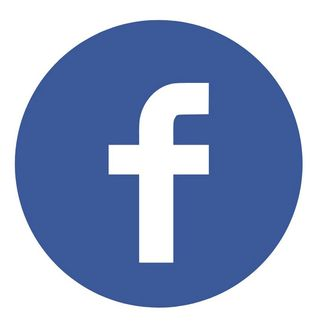

#**Step 1: Download Your Facebook Data**

* Head on to [Facebook](https://www.facebook.com/dyi/?referrer=yfi_settings) to download your data.
* Select the data you want to analyse(In this tutorial I will select only the ***Posts***)
* Then click on **Create File** 

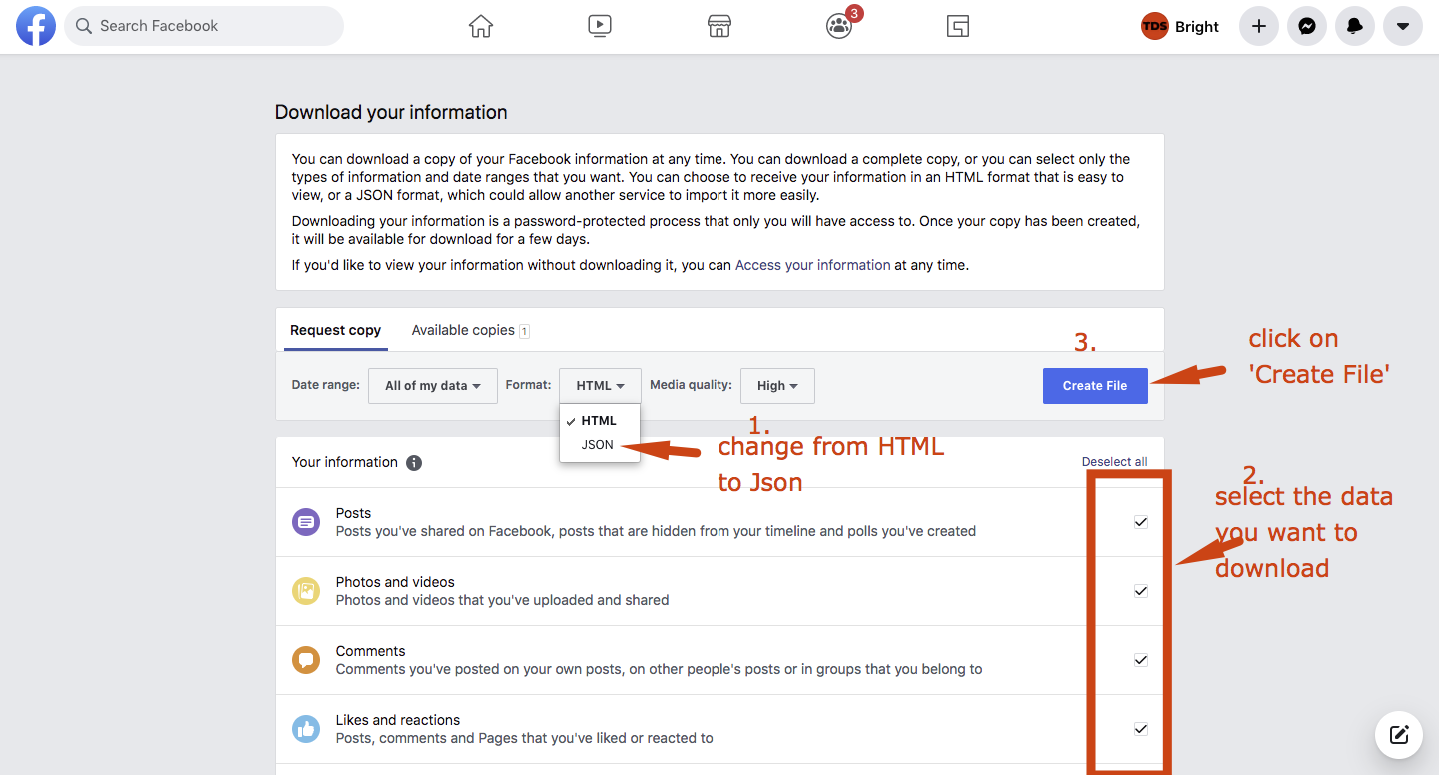

<br>

<br>

* Once your data is ready, Facebook will email you with a link to download the data.

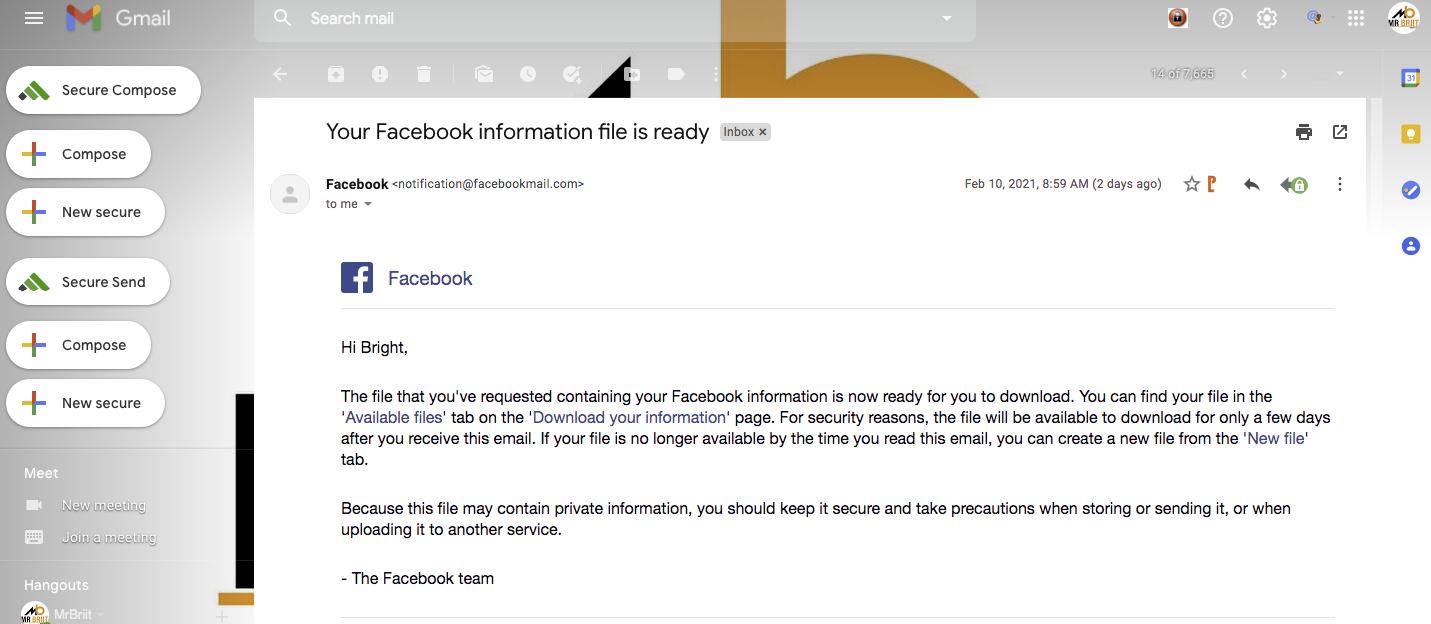

#**Step 2: Import Libraries and Read Your Data**

We will read the ***'your_posts_1.json'*** data that we downloaded.

In [ ]:

import pandas as pd

fb = pd.read_json('/content/your_posts_1.json')

fb.head()

,timestamp,attachments,data,title
0,2021-02-14 18:21:32,[{'data': [{'external_context': {'url': 'https...,[{'post': 'Learn how to Properly Deal With Dat...,Bright Kyeremeh shared a link to the group: Da...
1,2021-02-14 15:26:35,[],[{'update_timestamp': 1613316395}],NaN
2,2021-02-14 01:16:16,NaN,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...,Bright Kyeremeh shared a post to the group: Py...
3,2021-02-14 01:15:55,NaN,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...,Bright Kyeremeh shared a post to the group: Py...
4,2021-02-14 01:15:36,NaN,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...,Bright Kyeremeh shared a post to the group: Le...


#**Step 3: Format Your Data**

In this tutorial, we will be concerning ourselves with the frequency of our post over time. That's, how often we post on Facebook.

Therefore, we will drop the **attachments** and **title**. We will also format the timestamp into an appropriate time readable by Python and rename it properly.

In [ ]:
#drop some unnecessary columns
fb = fb.drop(['attachments', 'title'], axis=1)

# rename the timestamp column
fb.rename(columns={'timestamp': 'date'}, inplace=True)

# covert date to appropriate datetime format
pd.to_datetime(fb['date'])

fb.head()

,date,data
0,2021-02-14 18:21:32,[{'post': 'Learn how to Properly Deal With Dat...
1,2021-02-14 15:26:35,[{'update_timestamp': 1613316395}]
2,2021-02-14 01:16:16,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...
3,2021-02-14 01:15:55,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...
4,2021-02-14 01:15:36,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...


#**Step 4: Find Out Post Frequency**

Let's find out how often we post on Facebook in each month.

To make this easier, we will first set the **date** as index so that we can easily use it to access the other data.

In [ ]:
fb = fb.set_index('date')
fb.head()

,data
date,
2021-02-14 18:21:32,[{'post': 'Learn how to Properly Deal With Dat...
2021-02-14 15:26:35,[{'update_timestamp': 1613316395}]
2021-02-14 01:16:16,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...
2021-02-14 01:15:55,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...
2021-02-14 01:15:36,[{'post': 'https://bit.ly/3rPh2lP Offer ends s...


In [ ]:
post_counts = fb['data'].resample('W').size()
post_counts

date
2018-05-20      5
2018-05-27      0
2018-06-03     20
2018-06-10     48
2018-06-17     76
             ... 
2021-01-17    119
2021-01-24    207
2021-01-31    252
2021-02-07     50
2021-02-14     86
Freq: W-SUN, Name: data, Length: 144, dtype: int64

From the above, we select the column we want to resample by (in this case, is the data column).

Then we use the ***.resample()*** method with the argument as either **'MS'** (for "Month Start"), **'Q'**(for quater), **'W'**
(for weeks),etc. to resample our data.

Again, we use ***.size()*** to specify what we want to measure each month(in this case, the number of rows i.e posts) with a post date that fall within that month.

Then we finally we assign the resulting Series to a variable called ***post_counts.***

#**Step 5: Visualize Your Facebook Usage**

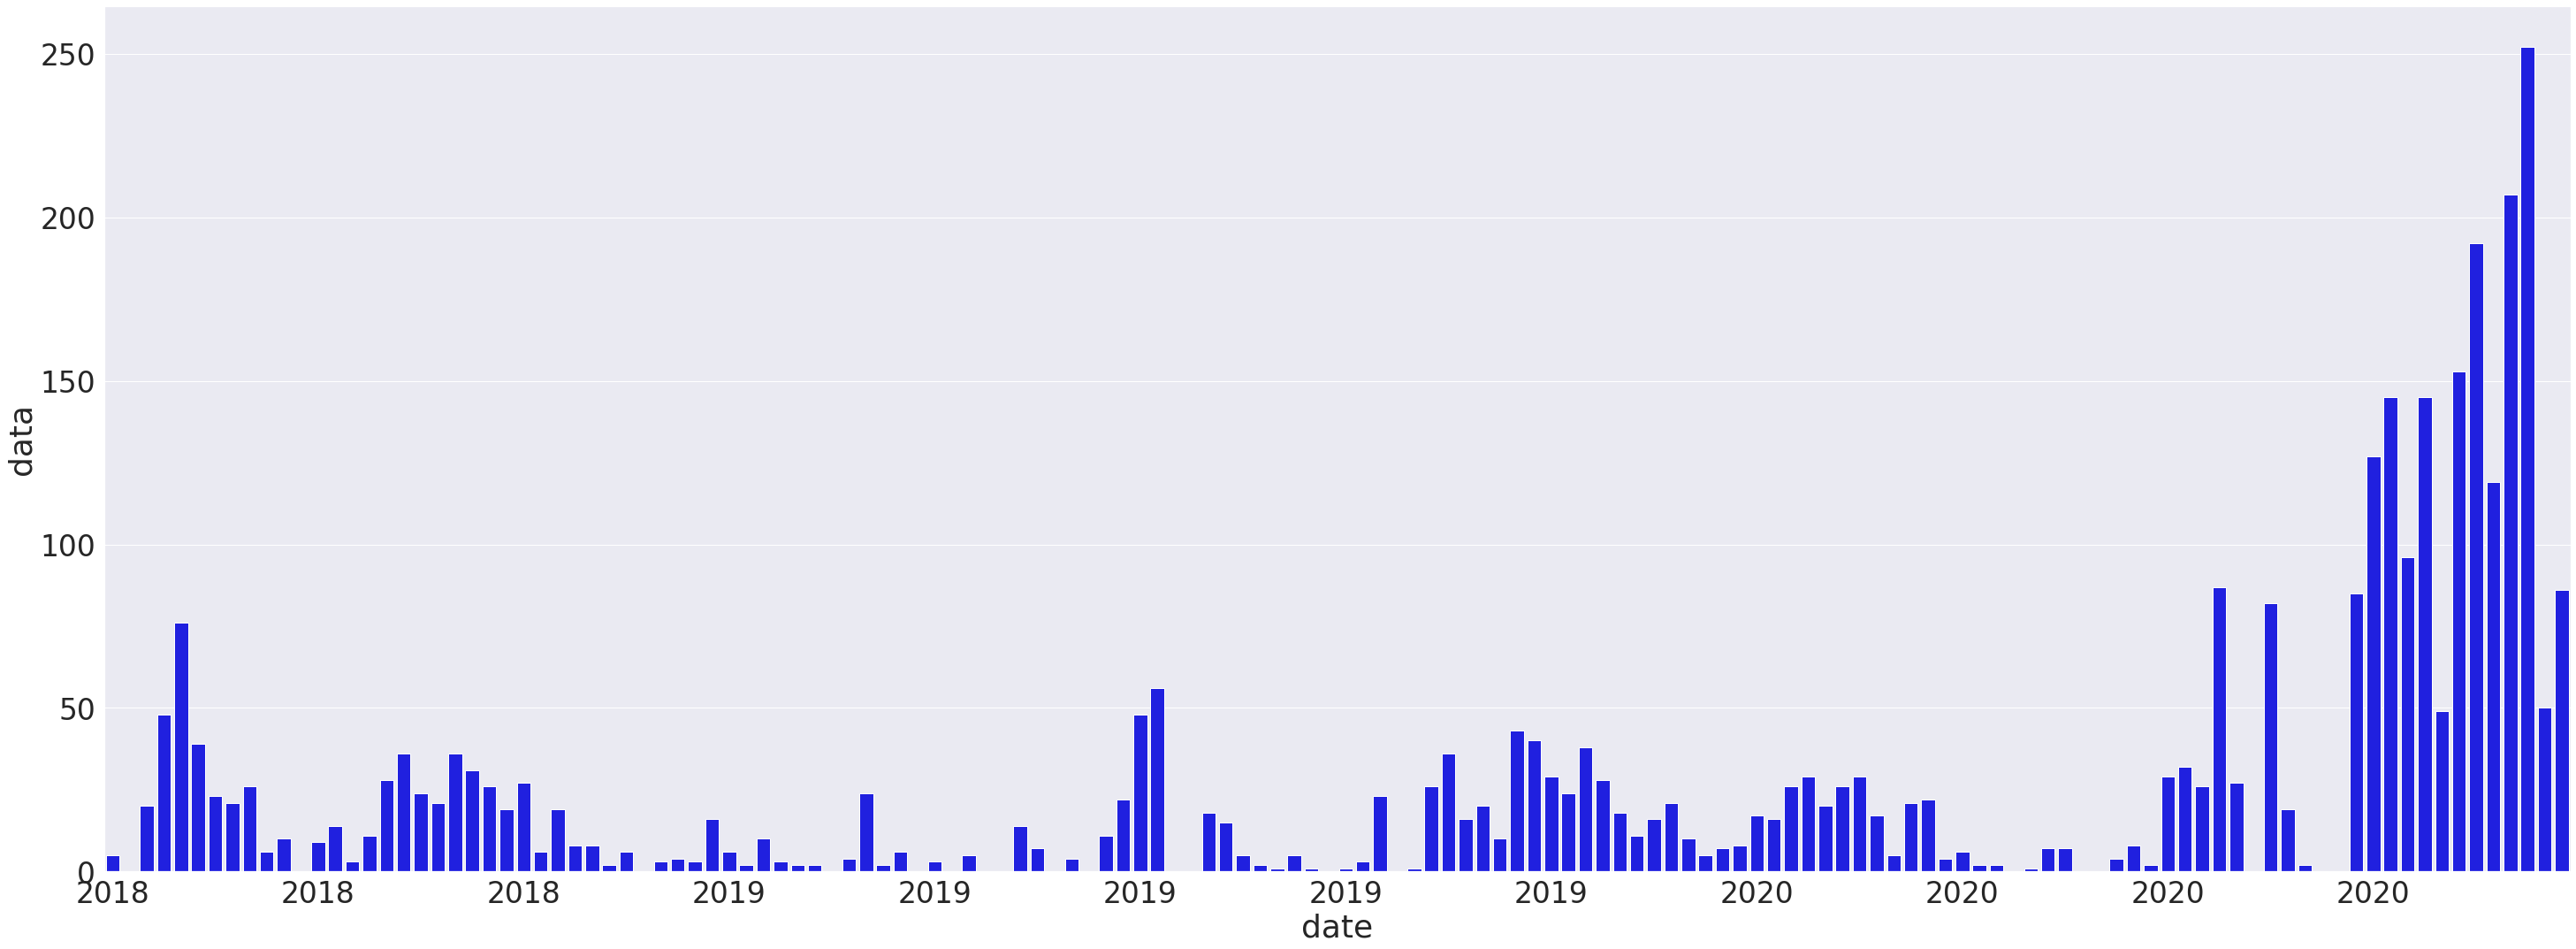

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# set figure size and font size
sns.set(rc={'figure.figsize':(50,18)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(0, len(x_labels), step=12)

#reformat date to display year only plt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

<br>

##**Your turn**

* Extract your data from Facebook by following the steps shown above.

* Use different arguments to get more insights, for instance, you can use **MS** or **W** instead of **Q** as the requency.

* Also, instead of post try to extract two or more of your Facebook data and concatenate it to have a more bigger data and perform analysis on that.

In the [Data Science and Machine Learning Course](https://bit.ly/3nlqfk2.), we will learn more advanced analysis and even deploy our projects live in production just like it is done in the real world industry.

We will also learn industry level data processing using Python in the [Python Data Analysis for Data Science and Machine Learning Course](https://bit.ly/2YF7hKi)